<a href="https://colab.research.google.com/github/evapats123/ship-fuel-model/blob/main/Ad_likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Libraries
# Basic libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Building ANN
import tensorflow as tf

from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from warnings import simplefilter
simplefilter("ignore")

# 2. Loading the Dataset

In [ ]:
data = pd.read_csv("/content/advertising.csv")
print(data.head())

   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

# 3. Exploratory Data Analysis

In [ ]:
# 3.1 Dataset Information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
# Rename columns if necessary
data = data.rename(columns={"Male": "Gender"})

In [ ]:
# Checking the number of rows and columns
print(data.shape)

(1000, 10)


In [ ]:
# 3.2 Total Missing Values
print(data.isnull().sum())


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


In [ ]:
# Assessing duplicate values
print("Number of duplicate values:", data.duplicated().sum())


Number of duplicate values: 0


In [ ]:
# 3.3 Summary of the Dataset
print(data.describe())

       Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage       Gender  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.0

In [ ]:
# Checking the distribution of target feature
click = data["Clicked on Ad"].value_counts()
print(click)

Clicked on Ad
0    500
1    500
Name: count, dtype: int64


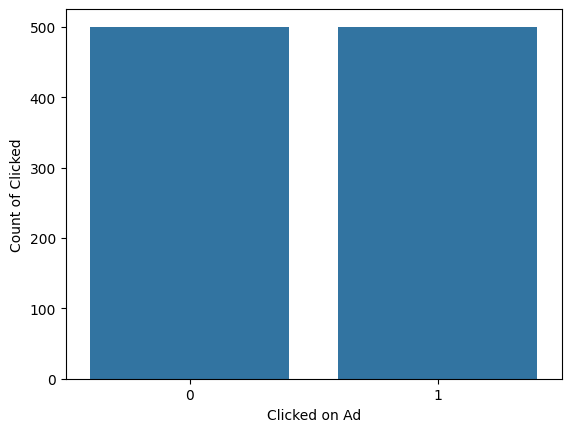

In [ ]:
sns.countplot(x="Clicked on Ad", data=data)
plt.xlabel("Clicked on Ad")
plt.ylabel("Count of Clicked")
plt.show()

In [ ]:
# 3.4 Analyzing Categorical Features
print(data.columns)

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')


# 4. Splitting the Dataset

In [ ]:
X = data.drop(["Ad Topic Line", "City", "Country", "Timestamp"], axis=1)
Y = data["Clicked on Ad"]

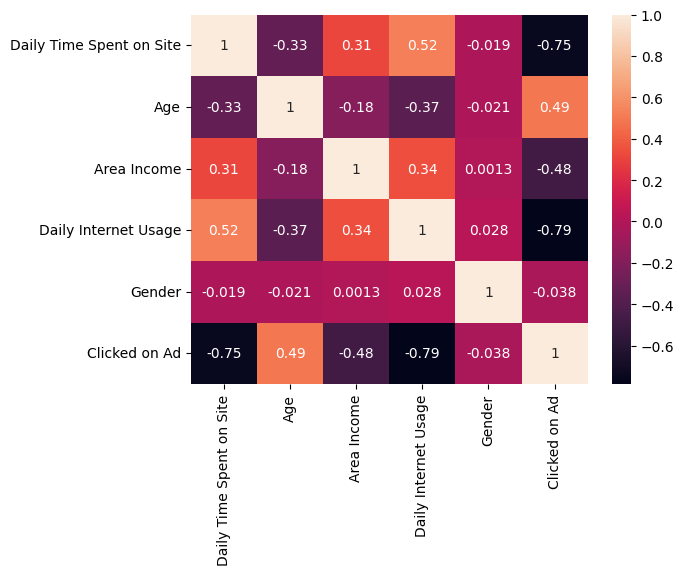

In [ ]:
# Correlation Matrix
data_corr = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(data_corr, annot=True)
plt.show()

In [ ]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 5. Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X_train_minmax = mmscaler.fit_transform(X_train)
X_test_minmax = mmscaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(700, 6)
(300, 6)
(700,)
(300,)


# 6. Model Selection

## 6.1 Logistic Regression

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
y_pred_LR = LR.predict(X_train)
CFM_LR = confusion_matrix(Y_train, y_pred_LR)
TN, FP, FN, TP = CFM_LR.ravel()
Sen_LR = TP / (TP + FN)
Spec_LR = TN / (TN + FP)

## 6.2 Support Vector Classifier

In [ ]:
SVM = SVC(kernel="linear", random_state=0)
SVM.fit(X_train, Y_train)
y_pred_SVM = SVM.predict(X_train)
CFM_SVM = confusion_matrix(Y_train, y_pred_SVM)
TN, FP, FN, TP = CFM_SVM.ravel()
Sen_SVM = TP / (TP + FN)
Spec_SVM = TN / (TN + FP)

## 6.3 KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, Y_train)
y_pred_KNN = KNN.predict(X_train)
CFM_KNN = confusion_matrix(Y_train, y_pred_KNN)
TN, FP, FN, TP = CFM_KNN.ravel()
Sen_KNN = TP / (TP + FN)
Spec_KNN = TN / (TN + FP)

## 6.4 Decision Tree Classifier

In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", random_state=0)
DT.fit(X_train, Y_train)
y_pred_DT = DT.predict(X_train)
CFM_DT = confusion_matrix(Y_train, y_pred_DT)
TN, FP, FN, TP = CFM_DT.ravel()
Sen_DT = TP / (TP + FN)
Spec_DT = TN / (TN + FP)

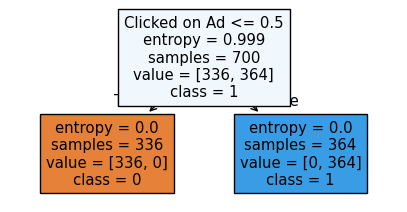

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 2.5))
plot_tree(DT, filled=True, feature_names=X.columns, class_names = Y.unique().astype(str))
plt.show()

## 6.5 Random Forest Classifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100, n_jobs=-1, bootstrap=True, min_samples_leaf=100, oob_score=True)
RF.fit(X_train, Y_train)
y_pred_RF = RF.predict(X_train)
CFM_RF = confusion_matrix(Y_train, y_pred_RF)
TN, FP, FN, TP = CFM_RF.ravel()
Sen_RF = TP / (TP + FN)
Spec_RF = TN / (TN + FP)

## 6.6 XGBClassifier

In [ ]:
XGB = XGBClassifier(n_estimators=100)
XGB.fit(X_train, Y_train)
y_pred_XGB = XGB.predict(X_train)
CFM_XGB = confusion_matrix(Y_train, y_pred_XGB)
TN, FP, FN, TP = CFM_XGB.ravel()
Sen_XGB = TP / (TP + FN)
Spec_XGB = TN / (TN + FP)


## 6.7 Artificial Neural Network

In [ ]:
Y_train_dum = pd.get_dummies(Y_train)

ANN = tf.keras.models.Sequential()
ANN.add(tf.keras.layers.Dense(units=5, activation="relu"))
ANN.add(tf.keras.layers.Dense(units=4, activation="relu"))
ANN.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

ANN.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
ANN.fit(X_train, Y_train, batch_size=32, epochs=50)

ANN.summary()

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5054 - loss: 4672.0283
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4884 - loss: 4078.3992
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4630 - loss: 3467.6899
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4793 - loss: 2612.4756
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4791 - loss: 1987.1425
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4688 - loss: 1362.2924
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4842 - loss: 714.3278
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4750 - loss: 140.2193
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5074 - loss: 0.6980
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - loss: 0.6959
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5167 - loss: 0.6941
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194 (780.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 130 (524.00 B)

In [ ]:
y_pred = ANN.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


# 7. Model Evaluation

## Logistic Regression

LogisticRegression() Confusion Matrix
[[333   3]
 [ 10 354]]
LR Sensitivity (Recall): 0.97
LR Specificity: 0.99
Accuracy: 0.98


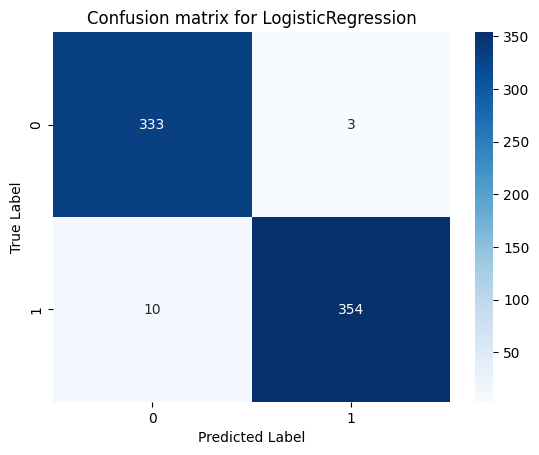

In [ ]:

print("LogisticRegression() Confusion Matrix")
print(CFM_LR)
print(f"LR Sensitivity (Recall): {Sen_LR:.2f}")
print(f"LR Specificity: {Spec_LR:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_LR), 2))

sns.heatmap(CFM_LR, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix for LogisticRegression")
plt.show()

## Support Vector Classifier

In [ ]:
print("SVM Confusion Matrix")
print(CFM_SVM)
print(f"SVM Sensitivity (Recall): {Sen_SVM:.2f}")
print(f"SVM Specificity: {Spec_SVM:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_SVM), 2))

SVM Confusion Matrix
[[329   7]
 [ 13 351]]
SVM Sensitivity (Recall): 0.96
SVM Specificity: 0.98
Accuracy: 0.97


## KNeighborsClassifier

In [ ]:
print("KNN Confusion Matrix")
print(CFM_KNN)
print(f"KNN Sensitivity (Recall): {Sen_KNN:.2f}")
print(f"KNN Specificity: {Spec_KNN:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_KNN), 2))

KNN Confusion Matrix
[[302  34]
 [ 56 308]]
KNN Sensitivity (Recall): 0.85
KNN Specificity: 0.90
Accuracy: 0.87


## DecisionTreeClassifier

In [ ]:

print("DT Confusion Matrix")
print(CFM_DT)
print(f"DT Sensitivity (Recall): {Sen_DT:.2f}")
print(f"DT Specificity: {Spec_DT:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_DT), 2))

DT Confusion Matrix
[[336   0]
 [  0 364]]
DT Sensitivity (Recall): 1.00
DT Specificity: 1.00
Accuracy: 1.0


## RandomForestClassifier

In [ ]:
print("RF Confusion Matrix")
print(CFM_RF)
print(f"RF Sensitivity (Recall): {Sen_RF:.2f}")
print(f"RF Specificity: {Spec_RF:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_RF), 2))

RF Confusion Matrix
[[334   2]
 [  1 363]]
RF Sensitivity (Recall): 1.00
RF Specificity: 0.99
Accuracy: 1.0


## XGBClassifier

In [ ]:
print("XGB Confusion Matrix")
print(CFM_XGB)
print(f"XGB Sensitivity (Recall): {Sen_XGB:.2f}")
print(f"XGB Specificity: {Spec_XGB:.2f}")
print("Accuracy:", round(accuracy_score(Y_train, y_pred_XGB), 2))

XGB Confusion Matrix
[[336   0]
 [  0 364]]
XGB Sensitivity (Recall): 1.00
XGB Specificity: 1.00
Accuracy: 1.0


## ANN

ANN Confusion Matrix
[[  0 164]
 [  0 136]]
ANN Sensitivity (Recall): 1.00
ANN Specificity: 0.00
Accuracy of the model: 0.4533333333333333


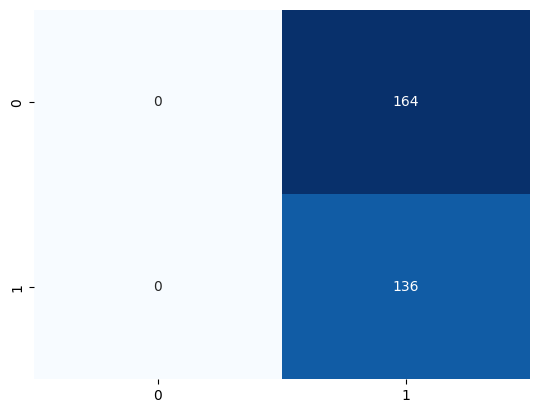

In [ ]:
cm = confusion_matrix(Y_test, y_pred.round())
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
TN, FP, FN, TP = cm.ravel()
Sen = TP / (TP + FN)
Spec = TN / (TN + FP)
print("ANN Confusion Matrix")
print(cm)
print(f"ANN Sensitivity (Recall): {Sen:.2f}")
print(f"ANN Specificity: {Spec:.2f}")
print("Accuracy of the model:", accuracy_score(Y_test, y_pred.round()))

# 8 Model Accuracy Comparison

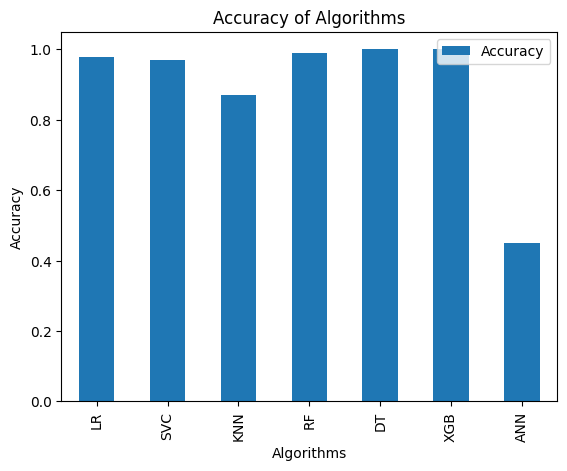

In [ ]:
# Accuracy comparison
df = {
    "Algorithm": ["LR", "SVC", "KNN", "RF", "DT", "XGB", "ANN"],
    "Accuracy": [0.98, 0.97, 0.87, 0.99, 1.00, 1.00, 0.45]
}
data = pd.DataFrame(df)

fig, ax = plt.subplots()
data.plot(kind="bar", x="Algorithm", y="Accuracy", ax=ax)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Algorithms")
plt.show()

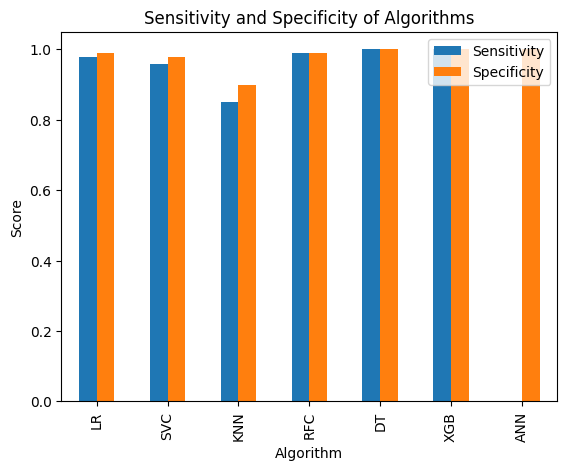

In [ ]:
# Sensitivity & Specificity comparison
dt = {
    "Algorithm": ["LR", "SVC", "KNN", "RFC", "DT", "XGB", "ANN"],
    "Specificity": [0.99, 0.98, 0.90, 0.99, 1.00, 1.00, 1.00],
    "Sensitivity": [0.98, 0.96, 0.85, 0.99, 1.00, 1.00, 0.00]
}
data = pd.DataFrame(dt)

fig, ax = plt.subplots()
data.plot(kind="bar", x="Algorithm", y=["Sensitivity", "Specificity"], ax=ax)
plt.xlabel("Algorithm")
plt.ylabel("Score")
plt.title("Sensitivity and Specificity of Algorithms")
plt.show()


